In [30]:

#STUDENT ADMISSION PREDICTION SYSTEM USING ANN IN PYTHON(BY OLIVE-OKAFOR OKWUNNA)
#https://github.com/Okwybobby/annstudentPrediction

#HOW TO RUN:
#1. Open https://binder.mybinder.ovh/
#2. Paste Okwybobby/annstudentPrediction in the GItHub field
#3. Click launch
#4. Copy the URL that looks like this: https://mybinder.org/v2/gh/Okwybobby/annstudentPrediction/master


#The dataset has GRE, GPA and university Rank. From these data we have to identify that if a student will
#get an admit (0 or 1) in that university or not. So this is a classification problem.

#Dataset is available at:
#https://stats.idre.ucla.edu/stat/data/binary.csv

#Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
%matplotlib inline
#Use following two lines of code to print multiple statements

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


#I have saved it in local as 'data.csv'


# Define the headers (the data does not have any)
#headers = ["Admit","GRE","GPA","Rank"]
# Read in the CSV file
df = pd.read_csv("data.csv" )

##First step is to visualize our dataset

#Check first 5 rows(the head function prints 5 rows by default if not specified)
print ("Head values:")
df.head()

#Check for the data types
print ("Types:")
df.dtypes
print (type(df))

#Check for the shape of the dataset
print ("Dataset Shape values:")
df.shape

#Check some information
df.info()

#Check if there are any null values in data
print ("Any Null values:")
df.isnull().values.any()


Head values:


,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


Types:


admit      int64
gre        int64
gpa      float64
rank       int64
dtype: object

<class 'pandas.core.frame.DataFrame'>
Dataset Shape values:


(400, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    int64  
 1   gre     400 non-null    int64  
 2   gpa     400 non-null    float64
 3   rank    400 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 12.6 KB
Any Null values:


False

In [31]:
##Second step is to check for some statistics

#Sum of each column value
print ("Sum of each column:")
df.sum()
##The sum of admit and rank column is not meaningful. Even the sum of GRE and GPA column seems meaningless.
##But from these value, We can say that we have to normalize the each feature for further calculation.

#Some more statistics
print ("Mean values: (Sum/Total examples)")
df.mean()

df.describe()

Sum of each column:


admit       127.00
gre      235080.00
gpa        1355.96
rank        994.00
dtype: float64

Mean values: (Sum/Total examples)


admit      0.3175
gre      587.7000
gpa        3.3899
rank       2.4850
dtype: float64

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


<AxesSubplot:xlabel='gre', ylabel='Density'>

<AxesSubplot:xlabel='gpa', ylabel='Density'>

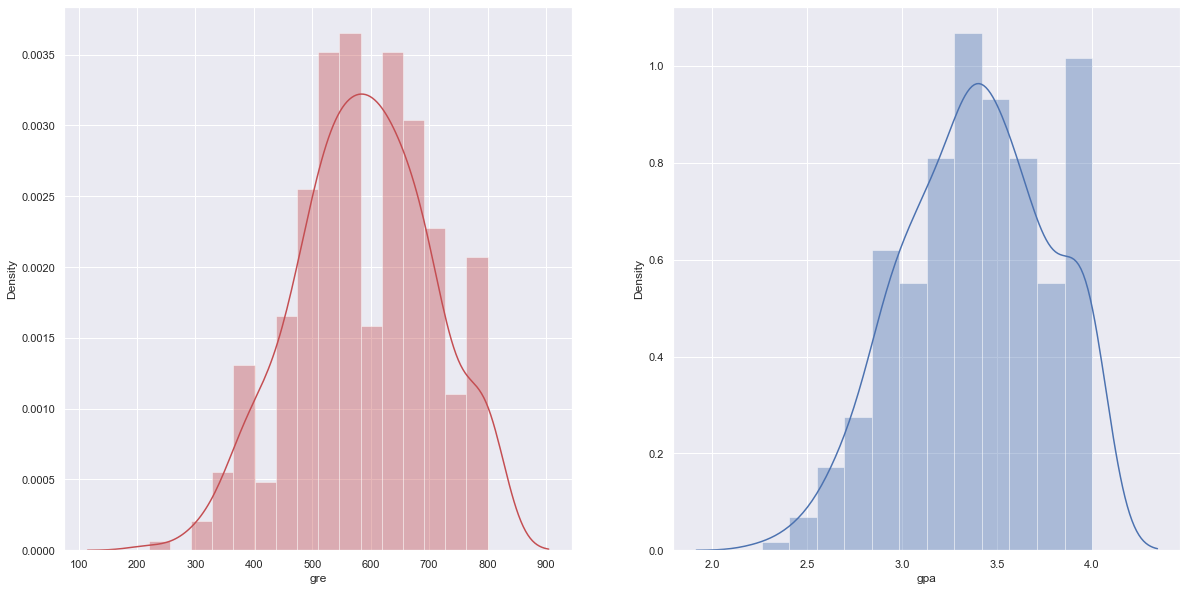

In [37]:
#Third step is to visualize these data in graphical form 
#I have used Seaborn library for data visualization

sns.set(color_codes=True)

#Set multiple axis
f, axes = plt.subplots(1, 2, figsize=(20, 10))

#GRE data
sns.distplot(df.iloc[:,1],color="r",ax = axes[0]) #All Row data and first column
#GPA data
sns.distplot(df.iloc[:,2],color="b",ax = axes[1]) #All Row data and second column

#We can see that the data forms good bell shaped curve.(Distributed in Gaussian values.)

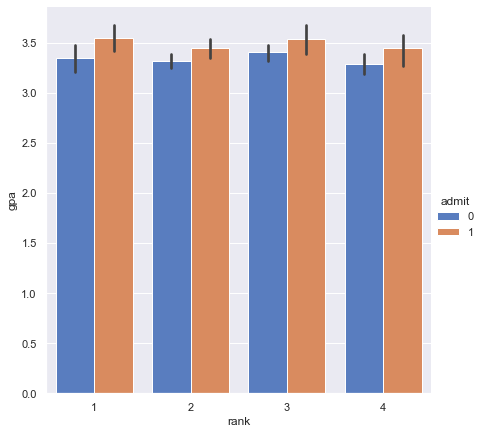

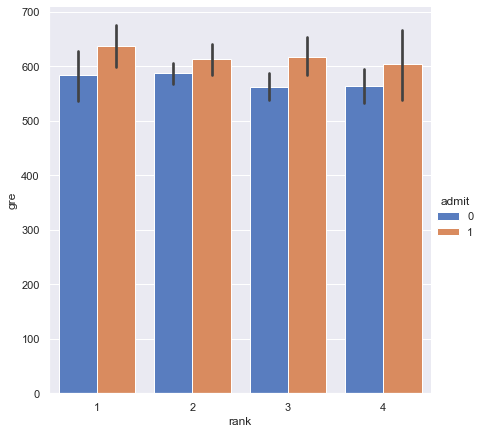

In [11]:

sns.factorplot(x="rank", y="gpa", hue="admit", data=df,
                   size=6, kind="bar", palette="muted")
sns.factorplot(x="rank", y="gre", hue="admit", data=df,
                   size=6, kind="bar", palette="muted")


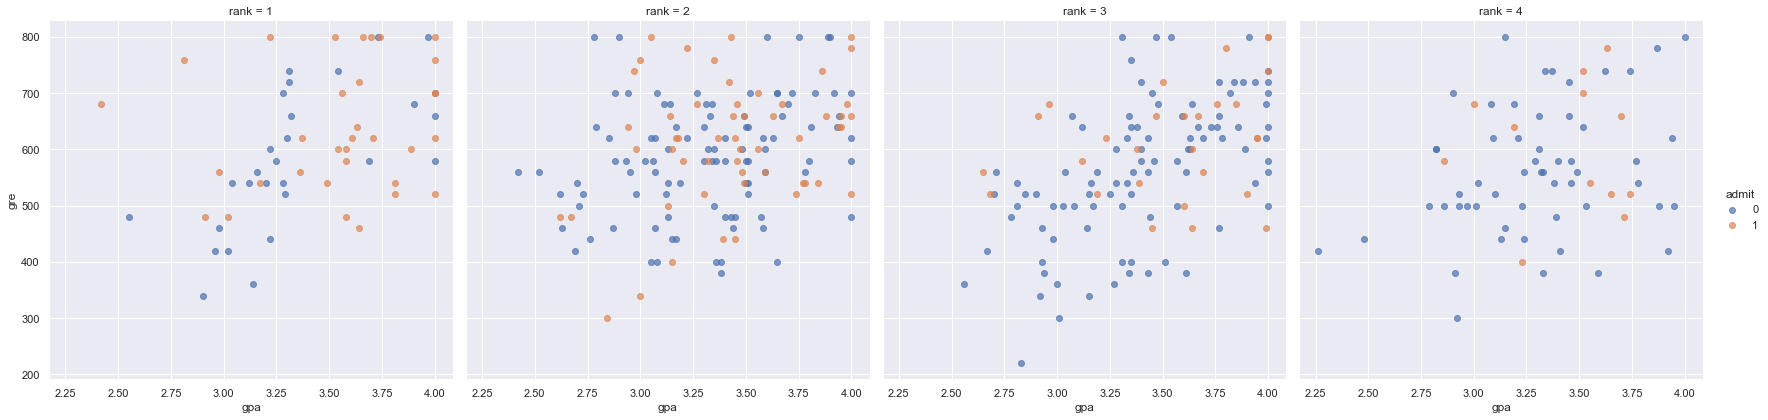

In [12]:
#Draw graphs for gre --> gpa for rank1,2,3,4

g = sns.FacetGrid(df,col='rank',hue="admit",size=6)
g.map(plt.scatter, "gpa", "gre", alpha=.7)
g.add_legend();

#From below graphs, we can see that for each rank, data are scattered randomly and we can not draw a line to seperate admit/rejected

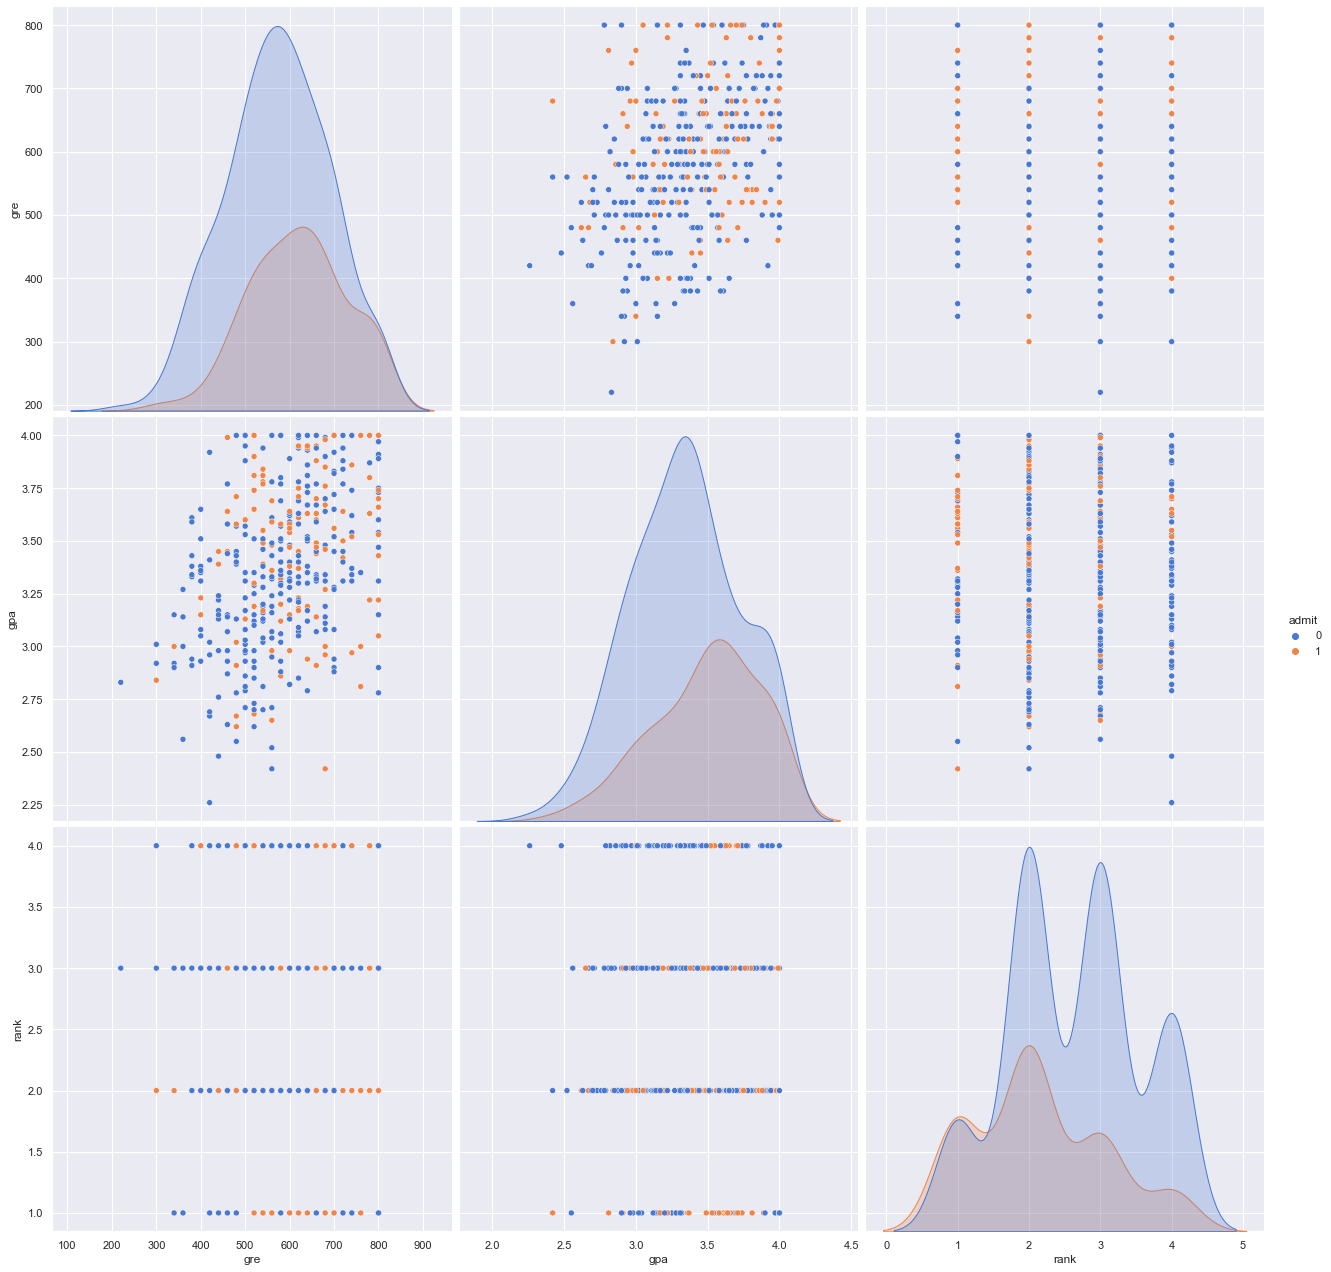

In [13]:
sns.pairplot(df, hue="admit",palette="muted",x_vars=['gre','gpa','rank'],y_vars=['gre','gpa','rank'],size=6)
#From following graphs we can see that the data are scattered randomly and we can not draw a simple boundary line for accepted/rejected

In [14]:
#Fourth part is to train our own model using sigmoid function and find accuracy of it.
#First of all, we have to convert 'rank' column into four seperate columns according to its value.
#I have used get_dummies method for it.

df_with_dummies = pd.get_dummies( df['rank'] )

#This will create four columns and fill values according to original column value. SO if in original 'rank' column,
#if the value is 3 for some example then in new columns, column 3 will have value 1 and all other (1,2,4) will have
#value 0
df_with_dummies.head()

,1,2,3,4
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [15]:
df_new = pd.concat([df, df_with_dummies], axis=1)
df_new = df_new.drop('rank',axis=1)
df_new.head()

,admit,gre,gpa,1,2,3,4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1


In [16]:
#Now we need to normalize GRE and GPA columns value as they have large values.
#I am using Sigmoid function. This function gives zero slope for very large and small values.
#So gradient descent will be zero if we use large values.
#So, I have normalize both columns with mean value as 0 and standard deviation as 1

gre_mean,gre_std = df_new['gre'].mean(),df_new['gre'].std()
gpa_mean,gpa_std = df_new['gpa'].mean(),df_new['gpa'].std()

df_new.loc[:,'gre'] = (df_new['gre'] - gre_mean) / gre_std
df_new.loc[:,'gpa'] = (df_new['gpa'] - gpa_mean) / gpa_std

df_new.head()

,admit,gre,gpa,1,2,3,4
0,0,-1.798011,0.578348,0,0,1,0
1,1,0.625884,0.736008,0,0,1,0
2,1,1.837832,1.603135,1,0,0,0
3,1,0.452749,-0.525269,0,0,0,1
4,0,-0.586063,-1.208461,0,0,0,1


In [17]:
msk = np.random.rand(len(df_new)) < 0.9

train = df_new[msk]

test = df_new[~msk]
print (len(train))
print (len(test))

print (train.head())

344
56
   admit       gre       gpa  1  2  3  4
1      1  0.625884  0.736008  0  0  1  0
2      1  1.837832  1.603135  1  0  0  0
3      1  0.452749 -0.525269  0  0  0  1
4      0 -0.586063 -1.208461  0  0  0  1
5      1  1.491561 -1.024525  0  1  0  0


In [18]:
# Split into features and targets
features, targets = train.drop('admit', axis=1), train['admit']
features_test, targets_test = test.drop('admit', axis=1), test['admit']

In [19]:
#Sigmoid function definition
def sigmoid(x):
    
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x):
    
    return sigmoid(x) * (1 - sigmoid(x))




In [20]:
#n_records will have no. of rows and n_features will have no. of column value

n_records, n_features = features.shape
last_loss = None

# Initialize weights
weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
#print (weights)
# Neural Network hyperparameters
epochs = 1000
learnrate = 0.5

for e in range(epochs):
    del_w = np.zeros(weights.shape)
    
    for x, y in zip(features.values, targets):
        # Loop through all records, x is the input, y is the target
        
        #del_w, W and X are 1 x 6.
        #Following np.dot will do element wise element multiplication.
        output = sigmoid(np.dot(x,weights))

        error = (y - output) * sigmoid_prime(np.dot(x,weights))

        del_w += error * x

        
    weights += (learnrate * del_w ) / n_records

    # Printing out the mean square error on the training set
    if e % (epochs / 10) == 0:
        out = sigmoid(np.dot(features, weights))
        loss = np.mean((out - targets) ** 2)
        if last_loss and last_loss < loss:
            print("Train loss: ", loss, "  WARNING - Loss Increasing")
        else:
            print("Train loss: ", loss)
        last_loss = loss


# Calculate accuracy on test data
tes_out = sigmoid(np.dot(features_test, weights))
predictions = tes_out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

Train loss:  0.2723113710443445
Train loss:  0.21053443096449764
Train loss:  0.20135241530403883
Train loss:  0.19855369723315808
Train loss:  0.19746612536688488
Train loss:  0.19697576011333062
Train loss:  0.19673008378503895
Train loss:  0.1965966196520019
Train loss:  0.19651936697334177
Train loss:  0.19647239300427233
Prediction accuracy: 0.732


In [21]:
#Sixt parth is about showing some Machine learning models from sklearn module.
#Above we have already created train and test data.
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#Model Preparation
num_trees = 200
max_features = 3
models = []
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('DTC',DecisionTreeClassifier()))
models.append(('RF',RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))

print (models)

[('LR', LogisticRegression()), ('LDA', LinearDiscriminantAnalysis()), ('KNN', KNeighborsClassifier()), ('DTC', DecisionTreeClassifier()), ('RF', RandomForestClassifier(max_features=3, n_estimators=200)), ('NB', GaussianNB()), ('SVM', SVC())]


In [22]:
msk1 = np.random.rand(len(df)) < 0.9

train_on_original = df[msk1]

test_on_original = df[~msk1]
print (len(train_on_original))
print (len(test_on_original))

print (train_on_original.head())

# Split into features and targets
features_train_original, targets_train_original = train_on_original.drop('admit', axis=1), train_on_original['admit']
features_test_original, targets_test_original = test_on_original.drop('admit', axis=1), test_on_original['admit']

350
50
   admit  gre   gpa  rank
0      0  380  3.61     3
1      1  660  3.67     3
2      1  800  4.00     1
3      1  640  3.19     4
4      0  520  2.93     4


In [23]:
#Fit model
from sklearn.model_selection import KFold
results = []
names = []
scoring = 'accuracy'

for name,model in models:
    kfold = KFold(n_splits=10,random_state=7)
    cv_results = cross_val_score(model,features_train_original,targets_train_original,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

print (results)
    

LR: 0.700000 (0.074779)
LDA: 0.700000 (0.074779)
KNN: 0.640000 (0.077932)
DTC: 0.582857 (0.080000)
RF: 0.622857 (0.097980)
NB: 0.697143 (0.064143)
SVM: 0.668571 (0.080000)
[array([0.65714286, 0.74285714, 0.74285714, 0.82857143, 0.68571429,
       0.74285714, 0.54285714, 0.62857143, 0.74285714, 0.68571429]), array([0.65714286, 0.74285714, 0.74285714, 0.82857143, 0.68571429,
       0.74285714, 0.54285714, 0.62857143, 0.74285714, 0.68571429]), array([0.6       , 0.68571429, 0.68571429, 0.74285714, 0.65714286,
       0.65714286, 0.45714286, 0.57142857, 0.62857143, 0.71428571]), array([0.51428571, 0.68571429, 0.6       , 0.54285714, 0.57142857,
       0.51428571, 0.51428571, 0.54285714, 0.77142857, 0.57142857]), array([0.65714286, 0.62857143, 0.71428571, 0.71428571, 0.65714286,
       0.6       , 0.4       , 0.6       , 0.74285714, 0.51428571]), array([0.68571429, 0.74285714, 0.74285714, 0.77142857, 0.71428571,
       0.74285714, 0.57142857, 0.6       , 0.74285714, 0.65714286]), array([0.54

[Text(0, 0, 'LR'),
 Text(1, 0, 'LDA'),
 Text(2, 0, 'KNN'),
 Text(3, 0, 'DTC'),
 Text(4, 0, 'RF'),
 Text(5, 0, 'NB'),
 Text(6, 0, 'SVM')]

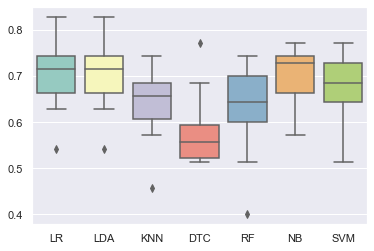

In [24]:
#Here LDA is achieving ~71% of training accuracy
#sns.boxplot(results)
ax = sns.boxplot(data=results, palette="Set3")
ax.set_xticklabels(names)

In [25]:
#Now the prediction of a new data on any model. I have worked with LDA.

model = LinearDiscriminantAnalysis()
model.fit(features_train_original,targets_train_original)

predictions = model.predict(features_test_original)
print (predictions)
print ("LDA Model")
print (accuracy_score(targets_test_original, predictions)*100)

print(classification_report(targets_test_original, predictions))


LinearDiscriminantAnalysis()

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 1 0 0]
LDA Model
74.0
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        39
           1       0.38      0.27      0.32        11

    accuracy                           0.74        50
   macro avg       0.59      0.57      0.58        50
weighted avg       0.71      0.74      0.72        50



In [26]:
#LDA is trained on the training data also we have made predictions on test data.
#So the overall accuracy is 73.33% with LDA.

<AxesSubplot:>

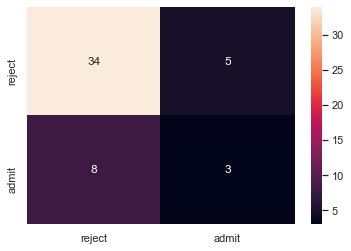

In [27]:
cm = confusion_matrix(targets_test_original,predictions)
sns.heatmap(cm,annot=True,xticklabels=['reject', 'admit'],yticklabels=['reject', 'admit'])

In [28]:
#Prediction on new data

#data_x = [gre,gpa,rank]
#model.predict method expects 2D array. First I tried to define data_1 as [750,4,1] which was 1D array #but
#it was throwing an error. So I converted data_1 from (3,) to (1,3).
labels = ["Rejected","Accepted"]
data_1 = np.array([750,4,1],ndmin=2)
data_2 = np.array([700,2,2],ndmin=2)
data_3 = np.array([200,2,4],ndmin=2)

prediction_1 = model.predict(data_1)
prediction_2 = model.predict(data_2)
prediction_3 = model.predict(data_3)

print ("Status for data_1 is: ", labels[int(prediction_1)])
print ("Status for data_2 is: ", labels[int(prediction_2)])
print ("Status for data_3 is: ", labels[int(prediction_3)])


Status for data_1 is:  Accepted
Status for data_2 is:  Rejected
Status for data_3 is:  Rejected


In [29]:
#As we can see for data_1 both gre and gpa and rank is higher so it is accepted
#For data_2 gpa is low thats why it is rejected
#For data_3 gpa,gre and rank is low so it is rejected.